In [1]:
import pandas as pd
import numpy as np
import re as re
import tensorflow as tf

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
#使用 均值和标准的上下偏移的随机值填充缺失值

In [2]:
train = pd.read_csv('train.csv')

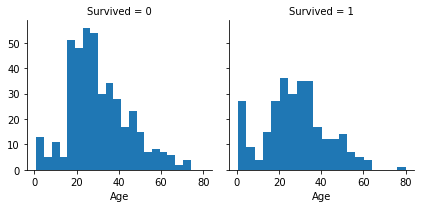

In [17]:
#图形显示
g = sns.FacetGrid(train , col = 'Survived')
g.map(plt.hist , 'Age' , bins = 20)

In [20]:
#将姓名中的头衔提取出来
this= train['Name'].str.extract(' ([A-Za-z]+)\.' , expand=False)

In [23]:
dummy = pd.get_dummies(train['Embarked'])

In [27]:
#竟然是dataframe类型
type(dummy)

pandas.core.frame.DataFrame

In [29]:
#下面就会将增加的哑变量作为feature添加进来
#train = train.join(dummy)

In [21]:
#查看缺失值数目
train['Age'].isnull().sum()

177

In [9]:
train['Age'].describe(include = ['O'])

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [13]:
train['Age'].count()

714

In [23]:
mean = train['Age'].mean()
#标准差
std = train['Age'].std()

#方差
#var = train['Age'].var()

In [21]:
std

211.0191247463081

In [27]:
loss_age_list = np.random.randint(mean-std , mean+std , size=train['Age'].isnull().sum())

In [28]:
train['Age'][np.isnan(train['Age'])] = loss_age_list

I:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [29]:
train['Age'].describe()

count    891.000000
mean      29.476061
std       13.548526
min        0.420000
25%       21.000000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [31]:
train['Age'] = train['Age'].astype(int)

In [33]:
train['Age'].describe()

count    891.000000
mean      29.460157
std       13.556844
min        0.000000
25%       21.000000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [34]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S


In [37]:
def get_title(name):
    title_search = re.search(' ([A-Za-z]+)\.', name)
    
    if title_search:
        return title_search.group(1)
    
    return ''


train['Title'] = train['Name'].apply(get_title)

In [39]:
train['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'Countess',
       'Jonkheer'], dtype=object)

In [40]:
train['Title'] = train['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')


In [42]:
train['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Rare', 'Mme', 'Ms', 'Mlle'], dtype=object)

In [67]:
array = np.array(train['Survived'])
#array = array.T
result = tf.one_hot(array , depth=2)

In [68]:
with tf.Session() as sess:
    haha = sess.run(result)

In [69]:
haha.shape

(891, 2)

In [5]:
a = tf.Variable(tf.constant(1 ,shape=[1,2]))

In [10]:
b = tf.Variable(1 , dtype=tf.int16)

In [11]:
b

<tf.Variable 'Variable_4:0' shape=() dtype=int16_ref>